In [1]:
# 시각화 라이브러리
import seaborn as sns
# 행렬 데이터 처리 라이브러리
import pandas as pd
# 수치 데이터 처리 라이브러리 (배열 형태를 따름, 차원관리)
import numpy as np

import matplotlib.pyplot as plt
from matplotlib import rc  # matplotlib 라이브러리에서 rc 모듈을 가져옴

plt.rcParams['axes.unicode_minus'] = False  # 그래프에서 마이너스 폰트 깨지는 문제에 대한 대처
rc('font', family='Malgun Gothic')  # 그래프에서 한글 폰트 깨지는 문제에 대한 대처
%matplotlib inline 
# 그래프를 jupyter notebook 상에서 출력하기 위한 설정

import os
import json

In [2]:
# 데이터 가져오기
file_path = "./data/"

df_1 = pd.read_csv(file_path + "oil.csv")
df_1

,Unnamed: 0,지역,상호,주소,기간,상표,셀프여부,고급휘발유,휘발유,경유,실내등유,영역,시
0,1,강원 강릉시,(주)대성길,강원 강릉시 구정면 칠성로 187,2019-01-01,S-OIL,셀프,0.0,1354.0,1254.0,900.0,강원,강릉시
1,2,강원 강릉시,(주)대성길,강원 강릉시 구정면 칠성로 187,2019-01-02,S-OIL,셀프,0.0,1354.0,1254.0,900.0,강원,강릉시
2,3,강원 강릉시,(주)대성길,강원 강릉시 구정면 칠성로 187,2019-01-03,S-OIL,셀프,0.0,1354.0,1254.0,900.0,강원,강릉시
3,4,강원 강릉시,(주)대성길,강원 강릉시 구정면 칠성로 187,2019-01-04,S-OIL,셀프,0.0,1344.0,1244.0,900.0,강원,강릉시
4,5,강원 강릉시,(주)대성길,강원 강릉시 구정면 칠성로 187,2019-01-05,S-OIL,셀프,0.0,1344.0,1244.0,900.0,강원,강릉시
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18138911,337551,충북 충주시,희망주유소,충북 충주시 금봉대로 398,2023-05-27,GS칼텍스,셀프,0.0,1568.0,1378.0,1200.0,충북,충주시
18138912,337552,충북 충주시,희망주유소,충북 충주시 금봉대로 398,2023-05-28,GS칼텍스,셀프,0.0,1568.0,1378.0,1200.0,충북,충주시
18138913,337553,충북 충주시,희망주유소,충북 충주시 금봉대로 398,2023-05-29,GS칼텍스,셀프,0.0,1568.0,1378.0,1200.0,충북,충주시
18138914,337554,충북 충주시,희망주유소,충북 충주시 금봉대로 398,2023-05-30,GS칼텍스,셀프,0.0,1568.0,1378.0,1200.0,충북,충주시


In [15]:
# df_1 카피
df1 = df_1.copy()
df1

,Unnamed: 0,지역,상호,주소,기간,상표,셀프여부,고급휘발유,휘발유,경유,실내등유,영역,시
0,1,강원 강릉시,(주)대성길,강원 강릉시 구정면 칠성로 187,2019-01-01,S-OIL,셀프,0.0,1354.0,1254.0,900.0,강원,강릉시
1,2,강원 강릉시,(주)대성길,강원 강릉시 구정면 칠성로 187,2019-01-02,S-OIL,셀프,0.0,1354.0,1254.0,900.0,강원,강릉시
2,3,강원 강릉시,(주)대성길,강원 강릉시 구정면 칠성로 187,2019-01-03,S-OIL,셀프,0.0,1354.0,1254.0,900.0,강원,강릉시
3,4,강원 강릉시,(주)대성길,강원 강릉시 구정면 칠성로 187,2019-01-04,S-OIL,셀프,0.0,1344.0,1244.0,900.0,강원,강릉시
4,5,강원 강릉시,(주)대성길,강원 강릉시 구정면 칠성로 187,2019-01-05,S-OIL,셀프,0.0,1344.0,1244.0,900.0,강원,강릉시
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18138911,337551,충북 충주시,희망주유소,충북 충주시 금봉대로 398,2023-05-27,GS칼텍스,셀프,0.0,1568.0,1378.0,1200.0,충북,충주시
18138912,337552,충북 충주시,희망주유소,충북 충주시 금봉대로 398,2023-05-28,GS칼텍스,셀프,0.0,1568.0,1378.0,1200.0,충북,충주시
18138913,337553,충북 충주시,희망주유소,충북 충주시 금봉대로 398,2023-05-29,GS칼텍스,셀프,0.0,1568.0,1378.0,1200.0,충북,충주시
18138914,337554,충북 충주시,희망주유소,충북 충주시 금봉대로 398,2023-05-30,GS칼텍스,셀프,0.0,1568.0,1378.0,1200.0,충북,충주시


In [18]:
# 결측치가 0인 데이터 평균으로 사용하기 위해 null값으로 변경
df1.loc[df1["휘발유"] == 0, '휘발유'] = None

In [19]:
df1.loc[df1["경유"] == 0, '경유'] = None

In [20]:
df1['휘발유'].isnull().sum()

78498

In [21]:
df1['경유'].isnull().sum()

12682

In [22]:
# df1에 년월 컬럼 추가
df1['년월'] = df1['기간'].apply(lambda x : x[:7])
df1

,Unnamed: 0,지역,상호,주소,기간,상표,셀프여부,고급휘발유,휘발유,경유,실내등유,영역,시,년월
0,1,강원 강릉시,(주)대성길,강원 강릉시 구정면 칠성로 187,2019-01-01,S-OIL,셀프,0.0,1354.0,1254.0,900.0,강원,강릉시,2019-01
1,2,강원 강릉시,(주)대성길,강원 강릉시 구정면 칠성로 187,2019-01-02,S-OIL,셀프,0.0,1354.0,1254.0,900.0,강원,강릉시,2019-01
2,3,강원 강릉시,(주)대성길,강원 강릉시 구정면 칠성로 187,2019-01-03,S-OIL,셀프,0.0,1354.0,1254.0,900.0,강원,강릉시,2019-01
3,4,강원 강릉시,(주)대성길,강원 강릉시 구정면 칠성로 187,2019-01-04,S-OIL,셀프,0.0,1344.0,1244.0,900.0,강원,강릉시,2019-01
4,5,강원 강릉시,(주)대성길,강원 강릉시 구정면 칠성로 187,2019-01-05,S-OIL,셀프,0.0,1344.0,1244.0,900.0,강원,강릉시,2019-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18138911,337551,충북 충주시,희망주유소,충북 충주시 금봉대로 398,2023-05-27,GS칼텍스,셀프,0.0,1568.0,1378.0,1200.0,충북,충주시,2023-05
18138912,337552,충북 충주시,희망주유소,충북 충주시 금봉대로 398,2023-05-28,GS칼텍스,셀프,0.0,1568.0,1378.0,1200.0,충북,충주시,2023-05
18138913,337553,충북 충주시,희망주유소,충북 충주시 금봉대로 398,2023-05-29,GS칼텍스,셀프,0.0,1568.0,1378.0,1200.0,충북,충주시,2023-05
18138914,337554,충북 충주시,희망주유소,충북 충주시 금봉대로 398,2023-05-30,GS칼텍스,셀프,0.0,1568.0,1378.0,1200.0,충북,충주시,2023-05


In [23]:
# 평균집계, 휘발유

df1_gas = df1.groupby(['영역', '시', '년월'])['휘발유'].mean().reset_index()
df1_gas

,영역,시,년월,휘발유
0,강원,강릉시,2019-01,1371.410333
1,강원,강릉시,2019-02,1360.854658
2,강원,강릉시,2019-03,1371.617647
3,강원,강릉시,2019-04,1410.709739
4,강원,강릉시,2019-05,1501.216247
...,...,...,...,...
12079,충북,충주시,2023-01,1551.693091
12080,충북,충주시,2023-02,1564.771084
12081,충북,충주시,2023-03,1589.103373
12082,충북,충주시,2023-04,1644.078917


In [24]:
# 영역, 년월만 따로, 휘발유
df1_gas1 = df1_gas.groupby(['영역', '년월'])['휘발유'].mean().reset_index()

In [25]:
# 평균집계, 경유
df1_dis = df1.groupby(['영역', '시', '년월'])['경유'].mean().reset_index()
df1_dis

,영역,시,년월,경유
0,강원,강릉시,2019-01,1273.456042
1,강원,강릉시,2019-02,1264.130327
2,강원,강릉시,2019-03,1273.753256
3,강원,강릉시,2019-04,1307.781358
4,강원,강릉시,2019-05,1375.552928
...,...,...,...,...
12079,충북,충주시,2023-01,1657.379273
12080,충북,충주시,2023-02,1582.083534
12081,충북,충주시,2023-03,1521.291259
12082,충북,충주시,2023-04,1528.086923


In [26]:
# 영역, 년월만 따로, 휘발유
df1_dis1 = df1_dis.groupby(['영역', '년월'])['경유'].mean().reset_index()

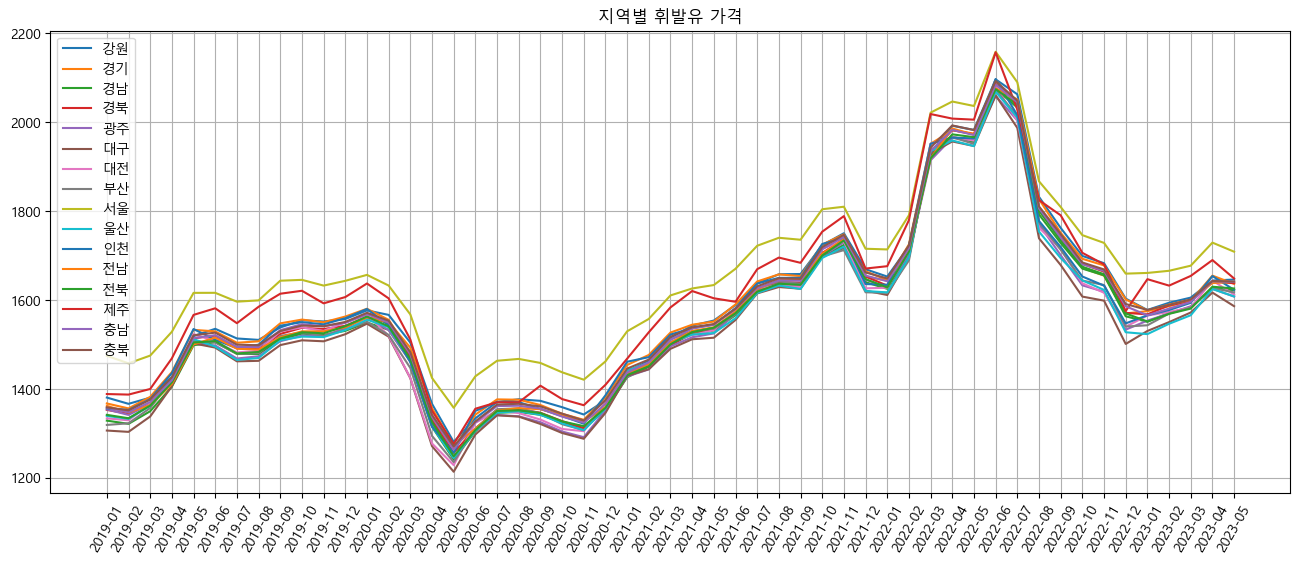

In [27]:
# 년월별 영역별 휘발유 가격
plt.figure(figsize=(16, 6))

for i in df1_gas1['영역'].unique():
    temp = df1_gas1[df1_gas1['영역'] == i]
    plt.plot(temp['년월'], temp['휘발유'])

plt.legend(df1_gas1['영역'].unique())
plt.title("지역별 휘발유 가격")
plt.xticks(rotation=60)
plt.grid()
plt.show()

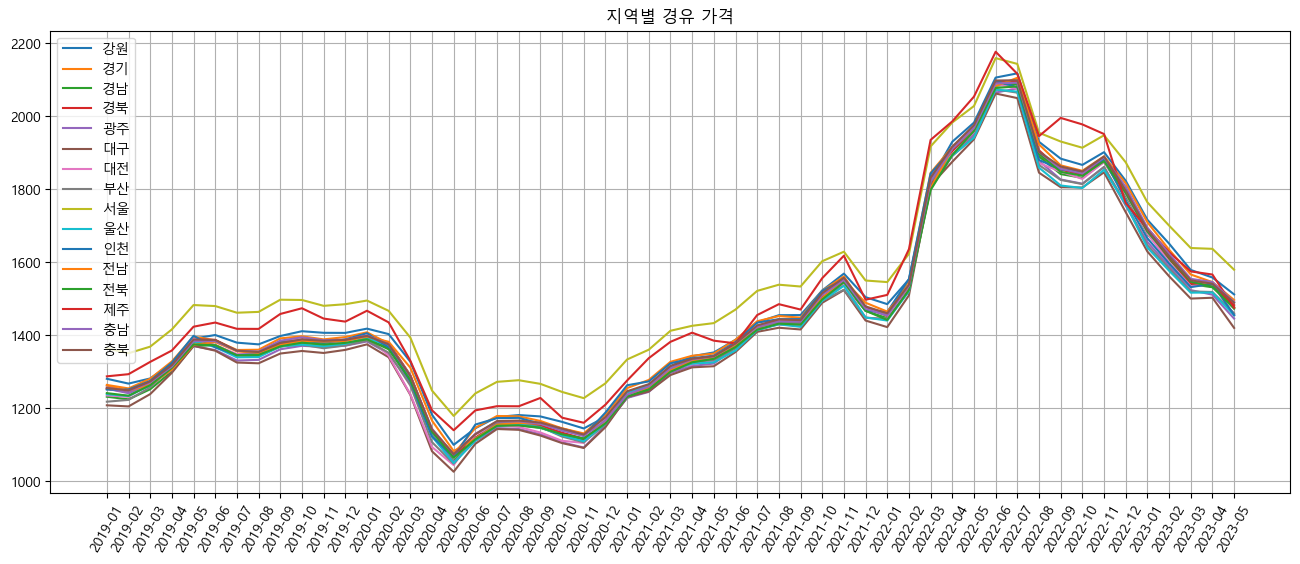

In [28]:
# 년월별 영역별 경유 가격
plt.figure(figsize=(16, 6))

for i in df1_dis1['영역'].unique():
    temp = df1_dis1[df1_dis1['영역'] == i]
    plt.plot(temp['년월'], temp['경유'])

plt.legend(df1_dis1['영역'].unique())
plt.xticks(rotation=60)
plt.title("지역별 경유 가격")
plt.grid()
plt.show()

# 유가 저점 : 2020-04 
 - 보기쉽게 오차 2개월로 잡고 그래프 작성 

In [30]:
# 기간 컬럼 생성
df1["기간"] = pd.to_datetime(df1['기간'])

start_date = pd.to_datetime('2020-02-01')
end_date = pd.to_datetime('2020-06-30')
df1_2020 = df1[(df1['기간'] >= start_date) & (df1['기간'] <= end_date)]

df1_2020

,Unnamed: 0,지역,상호,주소,기간,상표,셀프여부,고급휘발유,휘발유,경유,실내등유,영역,시,년월
4550975,1,강원 강릉시,(주)대성길,강원 강릉시 구정면 칠성로 187,2020-02-01,S-OIL,셀프,0.0,1529.0,1385.0,900.0,강원,강릉시,2020-02
4550976,2,강원 강릉시,(주)대성길,강원 강릉시 구정면 칠성로 187,2020-02-02,S-OIL,셀프,0.0,1529.0,1385.0,900.0,강원,강릉시,2020-02
4550977,3,강원 강릉시,(주)대성길,강원 강릉시 구정면 칠성로 187,2020-02-03,S-OIL,셀프,0.0,1529.0,1385.0,900.0,강원,강릉시,2020-02
4550978,4,강원 강릉시,(주)대성길,강원 강릉시 구정면 칠성로 187,2020-02-04,S-OIL,셀프,0.0,1529.0,1379.0,900.0,강원,강릉시,2020-02
4550979,5,강원 강릉시,(주)대성길,강원 강릉시 구정면 칠성로 187,2020-02-05,S-OIL,셀프,0.0,1529.0,1385.0,900.0,강원,강릉시,2020-02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6279272,341951,충북 충주시,희망주유소,충북 충주시 금봉대로 398,2020-06-26,GS칼텍스,셀프,0.0,1350.0,1150.0,750.0,충북,충주시,2020-06
6279273,341952,충북 충주시,희망주유소,충북 충주시 금봉대로 398,2020-06-27,GS칼텍스,셀프,0.0,1350.0,1150.0,750.0,충북,충주시,2020-06
6279274,341953,충북 충주시,희망주유소,충북 충주시 금봉대로 398,2020-06-28,GS칼텍스,셀프,0.0,1350.0,1150.0,750.0,충북,충주시,2020-06
6279275,341954,충북 충주시,희망주유소,충북 충주시 금봉대로 398,2020-06-29,GS칼텍스,셀프,0.0,1350.0,1150.0,750.0,충북,충주시,2020-06


In [31]:
# 영역, 기간에 대한 휘발유 경유 평균값 데이터프레임 생성
df1_2020_group = df1_2020.groupby(['영역', '기간'])[['휘발유', '경유']].mean().reset_index()
df1_2020_group

,영역,기간,휘발유,경유
0,강원,2020-02-01,1574.297420,1411.728916
1,강원,2020-02-02,1574.053030,1411.221719
2,강원,2020-02-03,1573.325758,1410.837594
3,강원,2020-02-04,1572.570348,1409.722222
4,강원,2020-02-05,1571.918058,1409.064662
...,...,...,...,...
2562,충북,2020-06-26,1352.495775,1154.317927
2563,충북,2020-06-27,1353.563994,1155.441176
2564,충북,2020-06-28,1353.893108,1155.850140
2565,충북,2020-06-29,1355.082865,1156.771709


In [32]:
# 영역 및 기간별 휘발유/경유 평균집계
df1_2020_gas = df1_2020_group.groupby(['영역', '기간'])['휘발유'].mean().reset_index()
df1_2020_dis = df1_2020_group.groupby(['영역', '기간'])['경유'].mean().reset_index()

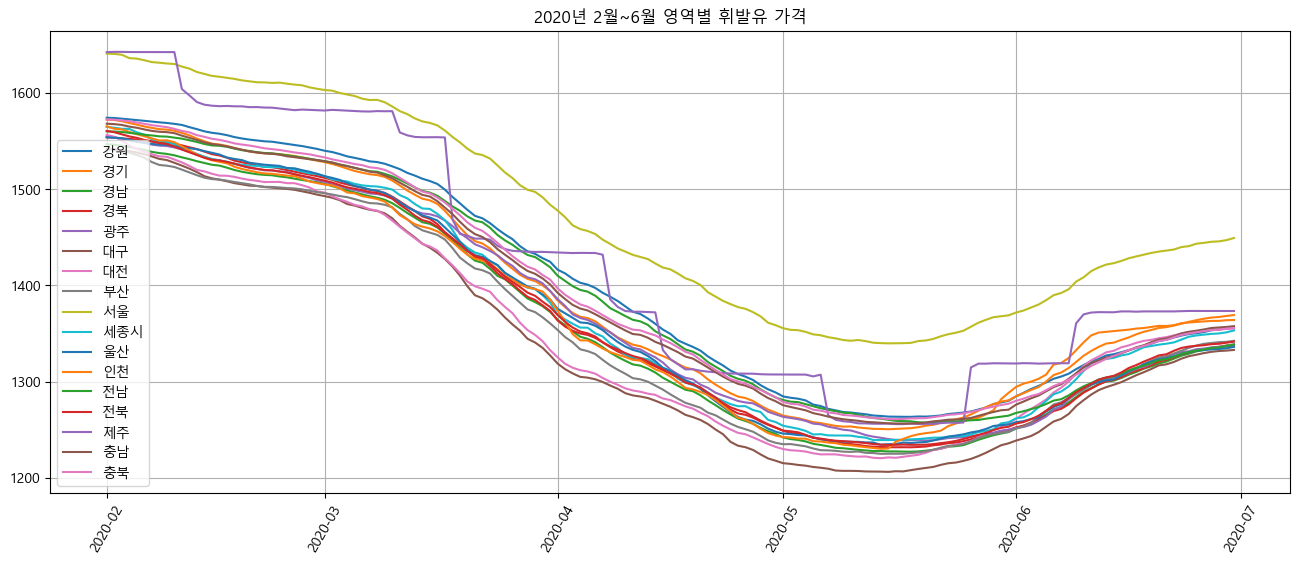

In [33]:
# 2020년 2월~6월 영역별 휘발유 가격
plt.figure(figsize=(16,6))

for i in df1_2020_gas['영역'].unique():
    temp = df1_2020_gas[df1_2020_gas['영역'] == i]
    plt.plot(temp['기간'], temp['휘발유'])
    
plt.title("2020년 2월~6월 영역별 휘발유 가격")
plt.legend(df1_2020_gas['영역'].unique())
plt.xticks(rotation=60)
plt.grid()
plt.show()
    

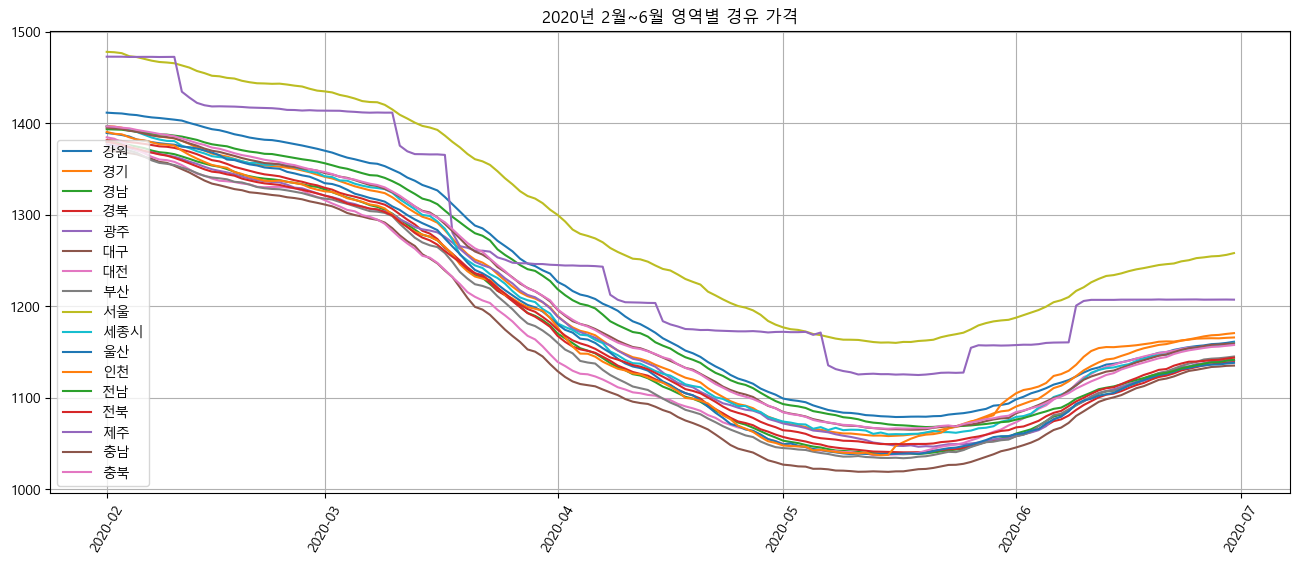

In [34]:
# 2020년 2월~6월 영역별 경유 가격
plt.figure(figsize=(16,6))

for i in df1_2020_dis['영역'].unique():
    temp = df1_2020_dis[df1_2020_dis['영역'] == i]
    plt.plot(temp['기간'], temp['경유'])
    
plt.title("2020년 2월~6월 영역별 경유 가격")
plt.legend(df1_2020_dis['영역'].unique())
plt.xticks(rotation=60)
plt.grid()
plt.show()
    

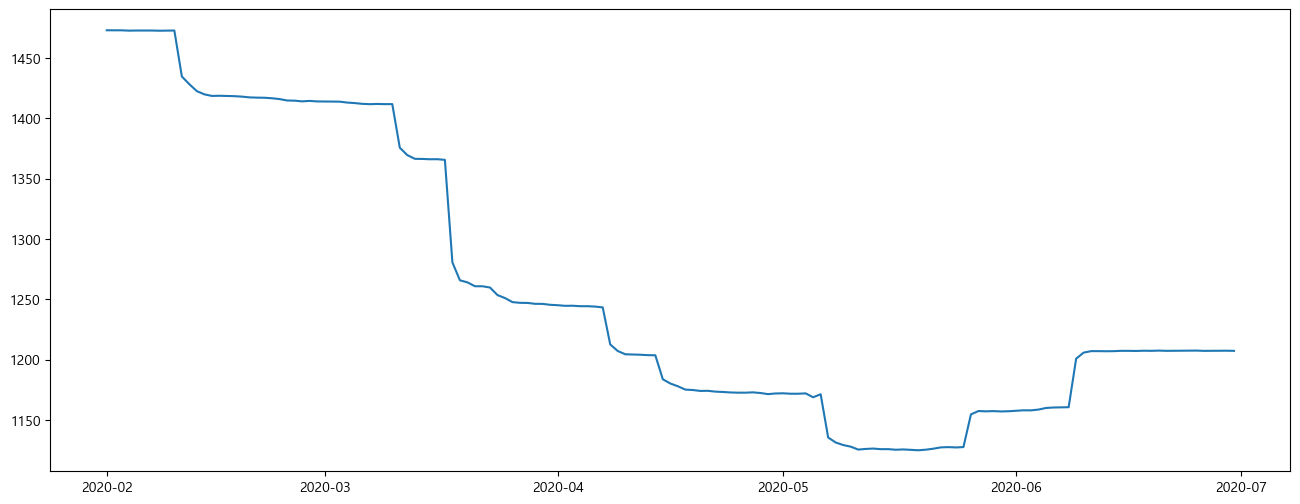

In [35]:
# 이상 그래프가 제주가 맞는지 확인
plt.figure(figsize=(16,6))

tmp = df1_2020_dis[df1_2020_dis['영역'] == '제주']
plt.plot(tmp['기간'], tmp['경유'])

plt.show()

# 유가 고점 : 2020-06
 - 역시 오차 2개월

In [36]:
# 유가 고점 : 2022-06
# +- 2개월 : 2022-04-01 ~ 2022-08-31

start_date = pd.to_datetime("2022-06-01")
end_date = pd.to_datetime("2022-07-31")

df1_2022 = df1[(df1['기간'] >= start_date) & (df1['기간'] <= end_date)]

In [37]:
# 영역, 기간에 대한 휘발유 경유 평균값 데이터프레임 생성
df1_2022_group = df1_2022.groupby(['영역', '기간'])[['휘발유', '경유']].mean().reset_index()
df1_2022_group

,영역,기간,휘발유,경유
0,강원,2022-06-01,2024.826984,2023.568075
1,강원,2022-06-02,2026.311111,2024.605634
2,강원,2022-06-03,2028.801587,2026.589984
3,강원,2022-06-04,2033.962025,2030.525078
4,강원,2022-06-05,2037.344937,2032.838558
...,...,...,...,...
1032,충북,2022-07-27,1941.188133,2012.906340
1033,충북,2022-07-28,1929.633864,2003.814121
1034,충북,2022-07-29,1918.804348,1995.590778
1035,충북,2022-07-30,1912.840810,1990.662824


In [38]:
# 영역 및 기간별 휘발유 / 경유 평균집계
df1_2022_gas = df1_2022_group.groupby(['영역', '기간'])['휘발유'].mean().reset_index()
df1_2022_dis = df1_2022_group.groupby(['영역', '기간'])['경유'].mean().reset_index()

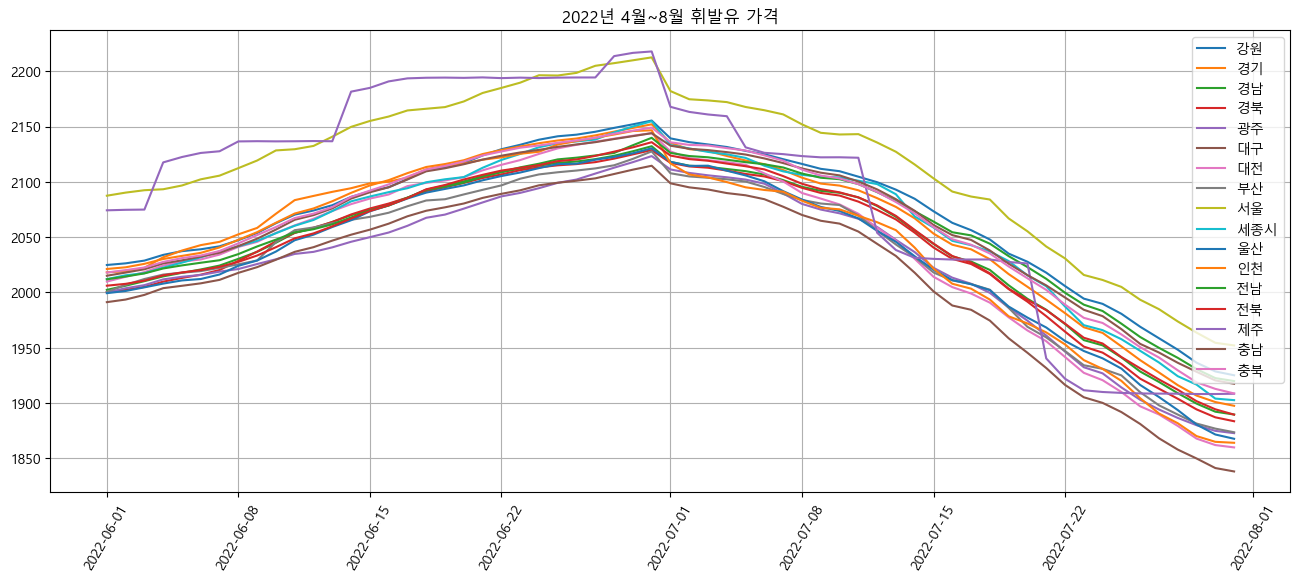

In [39]:
# 2022년 4월~8월 휘발유 가격
plt.figure(figsize=(16,6))

for i in df1_2022_group['영역'].unique():
    temp = df1_2022_gas[df1_2022_gas['영역'] == i]
    plt.plot(temp['기간'], temp['휘발유'])
    
plt.legend(df1_2022_group['영역'].unique())
plt.title("2022년 4월~8월 휘발유 가격")
plt.xticks(rotation=60)
plt.grid()
plt.show()

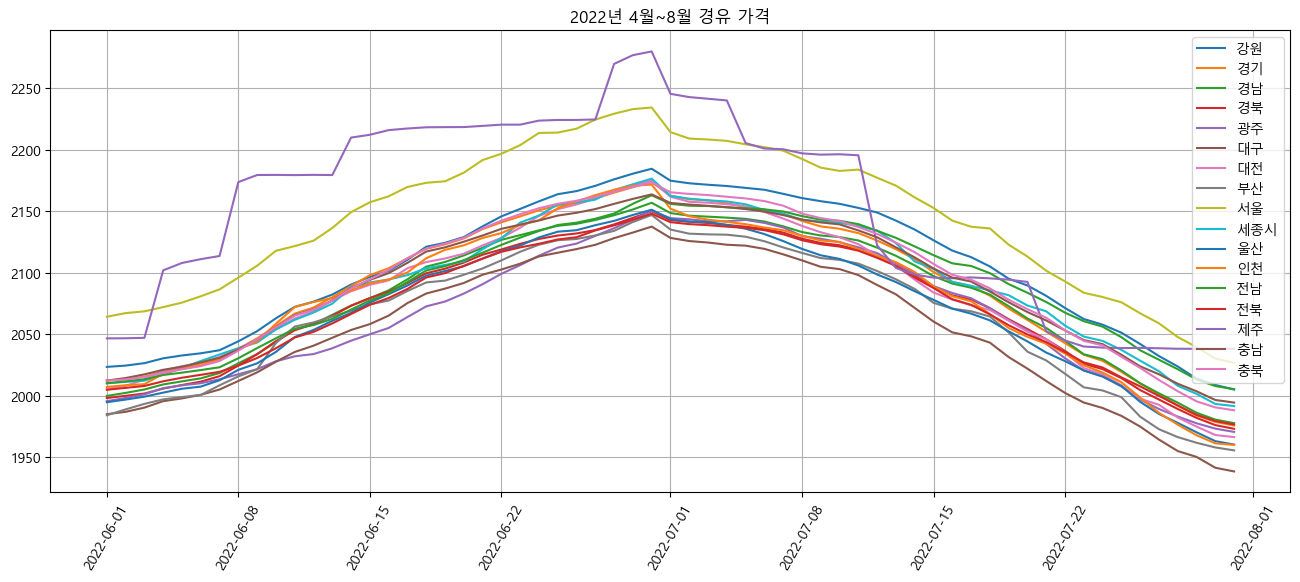

In [40]:
# 2022년 4월~8월 경유 가격
plt.figure(figsize=(16,6))

for i in df1_2022_group['영역'].unique():
    temp = df1_2022_dis[df1_2022_dis['영역'] == i]
    plt.plot(temp['기간'], temp['경유'])
    
plt.legend(df1_2022_group['영역'].unique())
plt.title("2022년 4월~8월 경유 가격")
plt.xticks(rotation=60)
plt.grid()
plt.show()

In [43]:
# 전국 평균 휘발유 가격 그래프를 그리기 위해 null값으로 만들었던 휘발유/경유 데이터를 ffill로 채워주기
df1.isnull().sum()

Unnamed: 0         0
지역                 0
상호                 0
주소                 0
기간                 0
상표                 0
셀프여부               0
고급휘발유              0
휘발유            78498
경유             12682
실내등유               0
영역                 0
시             106621
년월                 0
dtype: int64

In [55]:
# ffill
df_1_1 = df1.reset_index(drop=True).fillna(method='ffill')
df_1_1

,Unnamed: 0,지역,상호,주소,기간,상표,셀프여부,고급휘발유,휘발유,경유,실내등유,영역,시,년월
0,1,강원 강릉시,(주)대성길,강원 강릉시 구정면 칠성로 187,2019-01-01,S-OIL,셀프,0.0,1354.0,1254.0,900.0,강원,강릉시,2019-01
1,2,강원 강릉시,(주)대성길,강원 강릉시 구정면 칠성로 187,2019-01-02,S-OIL,셀프,0.0,1354.0,1254.0,900.0,강원,강릉시,2019-01
2,3,강원 강릉시,(주)대성길,강원 강릉시 구정면 칠성로 187,2019-01-03,S-OIL,셀프,0.0,1354.0,1254.0,900.0,강원,강릉시,2019-01
3,4,강원 강릉시,(주)대성길,강원 강릉시 구정면 칠성로 187,2019-01-04,S-OIL,셀프,0.0,1344.0,1244.0,900.0,강원,강릉시,2019-01
4,5,강원 강릉시,(주)대성길,강원 강릉시 구정면 칠성로 187,2019-01-05,S-OIL,셀프,0.0,1344.0,1244.0,900.0,강원,강릉시,2019-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18138911,337551,충북 충주시,희망주유소,충북 충주시 금봉대로 398,2023-05-27,GS칼텍스,셀프,0.0,1568.0,1378.0,1200.0,충북,충주시,2023-05
18138912,337552,충북 충주시,희망주유소,충북 충주시 금봉대로 398,2023-05-28,GS칼텍스,셀프,0.0,1568.0,1378.0,1200.0,충북,충주시,2023-05
18138913,337553,충북 충주시,희망주유소,충북 충주시 금봉대로 398,2023-05-29,GS칼텍스,셀프,0.0,1568.0,1378.0,1200.0,충북,충주시,2023-05
18138914,337554,충북 충주시,희망주유소,충북 충주시 금봉대로 398,2023-05-30,GS칼텍스,셀프,0.0,1568.0,1378.0,1200.0,충북,충주시,2023-05


In [56]:
# 기간을 기준으로 휘발유 경유 평균집계
df_1_1_1 = df_1_1.groupby('기간')[['휘발유', '경유']].mean().reset_index()
df_1_1_1

,기간,휘발유,경유
0,2019-01-01,1374.929525,1272.379074
1,2019-01-02,1371.517194,1269.177653
2,2019-01-03,1367.668629,1265.297602
3,2019-01-04,1363.987527,1261.890948
4,2019-01-05,1361.092856,1258.908618
...,...,...,...
1607,2023-05-27,1601.843173,1425.821963
1608,2023-05-28,1601.289498,1424.742781
1609,2023-05-29,1600.784839,1423.878880
1610,2023-05-30,1599.685240,1422.305856


In [57]:
# 5월 한달만
df_1_1_1["기간"] = pd.to_datetime(df_1_1_1['기간'])

start_date = pd.to_datetime('2020-05-01')
end_date = pd.to_datetime('2020-05-30')
df_fn_date1 = df_1_1_1[(df_1_1_1['기간'] >= start_date) & (df_1_1_1['기간'] <= end_date)]

df_fn_date1

,기간,휘발유,경유
486,2020-05-01,1264.102073,1075.301058
487,2020-05-02,1262.718895,1073.880403
488,2020-05-03,1261.792879,1072.805099
489,2020-05-04,1260.005512,1071.133771
490,2020-05-05,1257.427598,1068.326606
491,2020-05-06,1256.253277,1067.308949
492,2020-05-07,1253.988024,1065.078671
493,2020-05-08,1252.599074,1063.753780
494,2020-05-09,1251.605035,1062.541131
495,2020-05-10,1251.225363,1062.188692


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


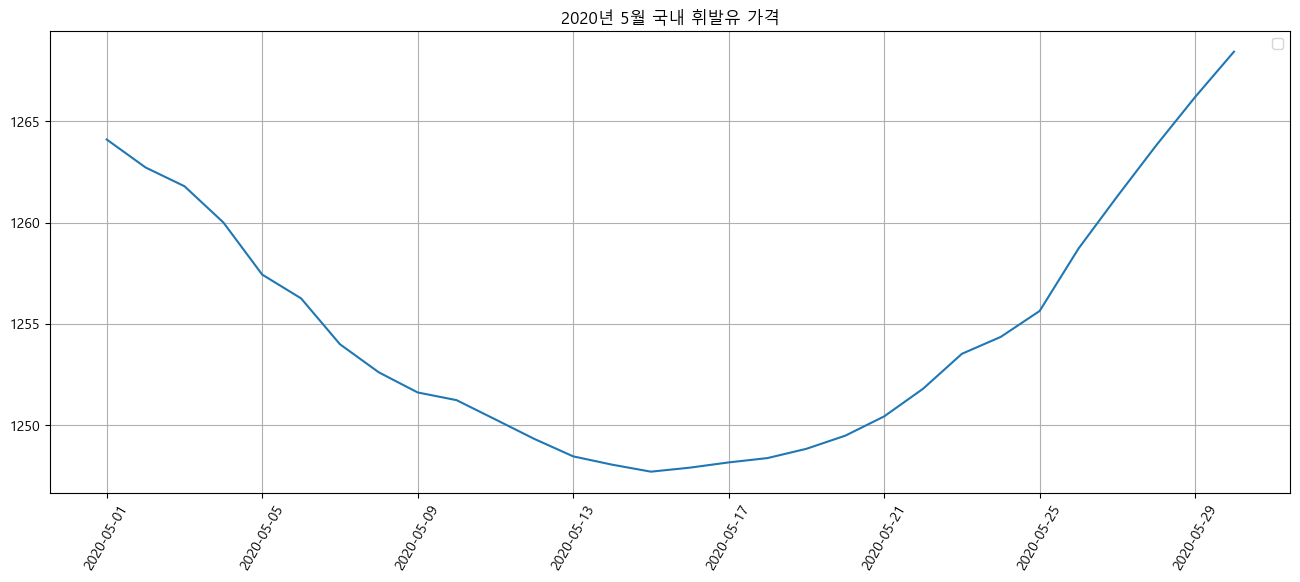

In [58]:

plt.figure(figsize=(16,6))

plt.plot(df_fn_date1['기간'], df_fn_date1['휘발유'])

plt.legend()
plt.title("2020년 5월 국내 휘발유 가격")
plt.xticks(rotation=60)
plt.grid()
plt.show()

In [3]:
# 국제 원유 데이터 가져온 뒤 연도 및 년월 컬럼 생성
df_2 = pd.read_csv('./data/국제_원유가격20080101_20230909.csv', encoding = "euc-kr")
df_2["연도"] = df_2['기간'].apply(lambda x : int('20'+x[:2]))
df_2 = df_2[df_2["연도"] >= 2019]
df_2["년월"] = df_2['기간'].apply(lambda x : '20'+x[:2] + "-" + x[3:5])
df_2

,기간,Dubai,Brent,WTI,연도,년월
2840,19년01월02일,51.86,54.91,46.54,2019,2019-01
2841,19년01월03일,53.20,55.95,47.09,2019,2019-01
2842,19년01월04일,55.59,57.06,47.96,2019,2019-01
2843,19년01월07일,56.79,57.33,48.52,2019,2019-01
2844,19년01월08일,56.18,58.72,49.78,2019,2019-01
...,...,...,...,...,...,...
3982,23년06월05일,76.41,76.71,72.15,2023,2023-06
3983,23년06월06일,74.31,76.29,71.74,2023,2023-06
3984,23년06월07일,75.22,76.95,72.53,2023,2023-06
3985,23년06월08일,76.16,75.96,71.29,2023,2023-06


In [5]:
# 결측치 체크
df_2.isnull().sum()

기간        0
Dubai    34
Brent     0
WTI      29
연도        0
년월        0
dtype: int64

In [12]:
# df_2 카피
df2 = df_2.copy()
df2

,기간,Dubai,Brent,WTI,연도,년월
2840,19년01월02일,51.86,54.91,46.54,2019,2019-01
2841,19년01월03일,53.20,55.95,47.09,2019,2019-01
2842,19년01월04일,55.59,57.06,47.96,2019,2019-01
2843,19년01월07일,56.79,57.33,48.52,2019,2019-01
2844,19년01월08일,56.18,58.72,49.78,2019,2019-01
...,...,...,...,...,...,...
3982,23년06월05일,76.41,76.71,72.15,2023,2023-06
3983,23년06월06일,74.31,76.29,71.74,2023,2023-06
3984,23년06월07일,75.22,76.95,72.53,2023,2023-06
3985,23년06월08일,76.16,75.96,71.29,2023,2023-06


In [6]:
# 평균 사용할거니 일단 그냥 진행
df_2_mean = df_2.groupby('년월')[['Dubai', 'Brent', 'WTI']].mean()
df_2_mean

,Dubai,Brent,WTI
년월,,,
2019-01,59.087273,60.240909,51.550476
2019-02,64.587222,64.431500,54.980526
2019-03,66.941905,67.027619,58.168095
2019-04,70.944762,71.628571,63.870952
2019-05,69.383810,70.303043,60.865455
2019-06,61.776316,63.038000,54.706500
2019-07,63.277826,64.214783,57.546364
2019-08,59.126000,59.501818,54.844091
2019-09,61.130476,62.287143,56.967000


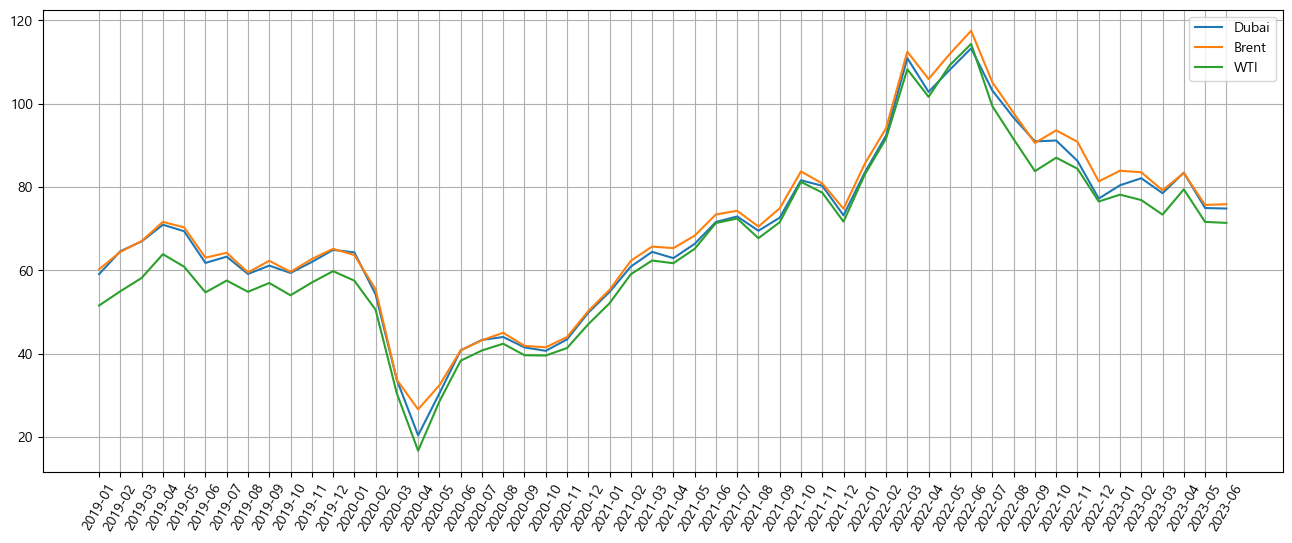

In [7]:
# 국제 원유가 평균 그래프 작성
plt.figure(figsize=(16,6))
plt.plot(df_2_mean.index, df_2_mean[["Dubai", "Brent", "WTI"]])
plt.xticks(rotation=60)
plt.grid()
plt.legend(['Dubai', 'Brent', 'WTI'])
plt.show()

In [62]:
# 년월일 컬럼 생성
df_2['년월일'] = df_2['기간'].apply(lambda x : "20" + x[:2] + "-" + x[3:5] + "-" + x[6:8])
df_2

,기간,Dubai,Brent,WTI,연도,년월,년월일
2840,19년01월02일,51.86,54.91,46.54,2019,2019-01,2019-01-02
2841,19년01월03일,53.20,55.95,47.09,2019,2019-01,2019-01-03
2842,19년01월04일,55.59,57.06,47.96,2019,2019-01,2019-01-04
2843,19년01월07일,56.79,57.33,48.52,2019,2019-01,2019-01-07
2844,19년01월08일,56.18,58.72,49.78,2019,2019-01,2019-01-08
...,...,...,...,...,...,...,...
3982,23년06월05일,76.41,76.71,72.15,2023,2023-06,2023-06-05
3983,23년06월06일,74.31,76.29,71.74,2023,2023-06,2023-06-06
3984,23년06월07일,75.22,76.95,72.53,2023,2023-06,2023-06-07
3985,23년06월08일,76.16,75.96,71.29,2023,2023-06,2023-06-08


In [63]:
# 결측치 ffill로 채우기
df_2_1 = df_2.reset_index(drop=True).fillna(method='ffill')

In [64]:
df_2_1.isnull().sum()

기간       0
Dubai    0
Brent    0
WTI      0
연도       0
년월       0
년월일      0
dtype: int64

In [66]:
# df_2의 2020-04-01 ~ 2020-04-30 최저가 시점 확인
# - 먼저 기간 설정

df_2_1["년월일"] = pd.to_datetime(df_2_1['년월일'])

start_date = pd.to_datetime('2020-04-01')
end_date = pd.to_datetime('2020-04-30')
df2_2020 = df_2_1[(df_2_1['년월일'] >= start_date) & (df_2_1['년월일'] <= end_date)]

df2_2020

,기간,Dubai,Brent,WTI,연도,년월,년월일
322,20년04월01일,21.23,24.74,20.31,2020,2020-04,2020-04-01
323,20년04월02일,21.55,29.94,25.32,2020,2020-04,2020-04-02
324,20년04월03일,24.51,34.11,28.34,2020,2020-04,2020-04-03
325,20년04월06일,24.87,33.05,26.08,2020,2020-04,2020-04-06
326,20년04월07일,24.88,31.87,23.63,2020,2020-04,2020-04-07
327,20년04월08일,23.52,32.84,25.09,2020,2020-04,2020-04-08
328,20년04월09일,23.32,31.48,22.76,2020,2020-04,2020-04-09
329,20년04월13일,22.31,31.74,22.41,2020,2020-04,2020-04-13
330,20년04월14일,21.66,29.60,20.11,2020,2020-04,2020-04-14
331,20년04월15일,19.68,27.69,19.87,2020,2020-04,2020-04-15


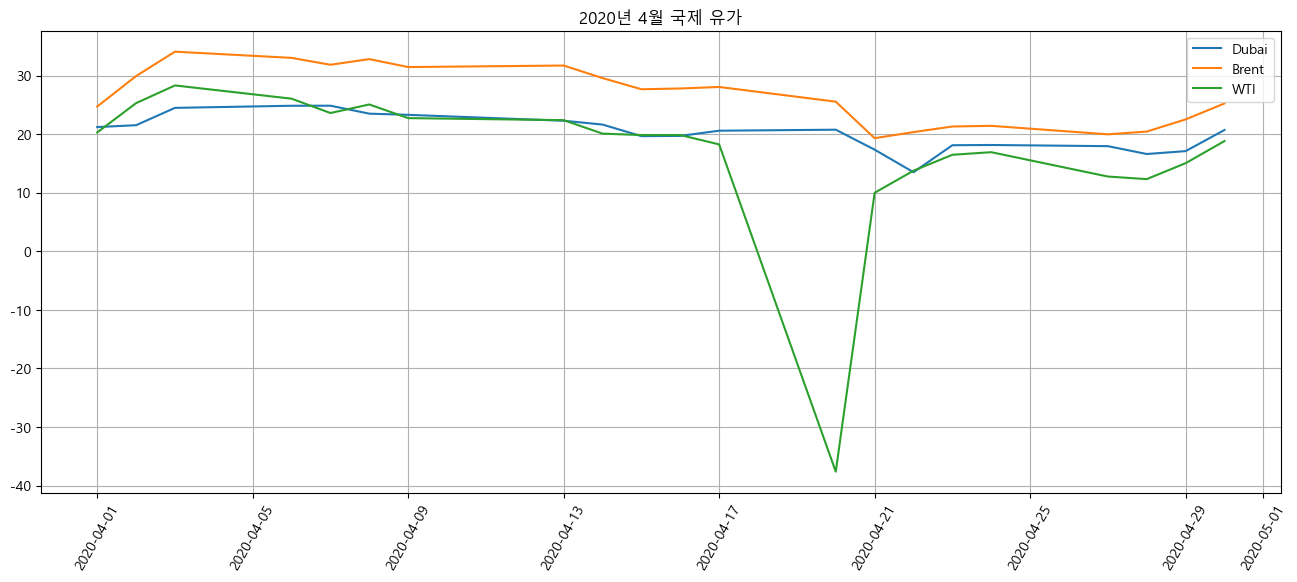

In [67]:
# 4월 최저가 갱신 기준 가격 , WTI 이상치 확인
plt.figure(figsize=(16,6))
plt.plot(df2_2020['년월일'], df2_2020["Dubai"])
plt.plot(df2_2020['년월일'], df2_2020["Brent"])
plt.plot(df2_2020['년월일'], df2_2020["WTI"])
plt.xticks(rotation=60)
plt.grid()
plt.legend(['Dubai', 'Brent', 'WTI'])
plt.title("2020년 4월 국제 유가")
plt.show()

In [70]:
# 2020-04-20 확인
df2_2020[12:]

,기간,Dubai,Brent,WTI,연도,년월,년월일
334,20년04월20일,20.78,25.57,-37.63,2020,2020-04,2020-04-20
335,20년04월21일,17.37,19.33,10.01,2020,2020-04,2020-04-21
336,20년04월22일,13.52,20.37,13.78,2020,2020-04,2020-04-22
337,20년04월23일,18.13,21.33,16.50,2020,2020-04,2020-04-23
338,20년04월24일,18.17,21.44,16.94,2020,2020-04,2020-04-24
339,20년04월27일,17.97,19.99,12.78,2020,2020-04,2020-04-27
340,20년04월28일,16.63,20.46,12.34,2020,2020-04,2020-04-28
341,20년04월29일,17.12,22.54,15.06,2020,2020-04,2020-04-29
342,20년04월30일,20.73,25.27,18.84,2020,2020-04,2020-04-30


In [59]:
# 전국 평균 휘발유/경유 가격 평균 그래프
# - 기간 기준 휘발유/경유 평균집계
df1_gas11 = df1.groupby(['기간'])['휘발유'].mean().reset_index()
df1_dis11 = df1.groupby(['기간'])['경유'].mean().reset_index()

In [60]:
# 두 데이터프레임 합치기
df_fn = pd.merge(left=df1_gas11,
        right=df1_dis11,
        how="left",
        left_on="기간",
        right_on="기간")
df_fn

,기간,휘발유,경유
0,2019-01-01,1375.089792,1272.434737
1,2019-01-02,1371.593579,1269.208167
2,2019-01-03,1367.682778,1265.316870
3,2019-01-04,1363.943158,1261.826853
4,2019-01-05,1361.027703,1258.885484
...,...,...,...
1607,2023-05-27,1601.697003,1425.816295
1608,2023-05-28,1601.157093,1424.712498
1609,2023-05-29,1600.667345,1423.865886
1610,2023-05-30,1599.592531,1422.284979


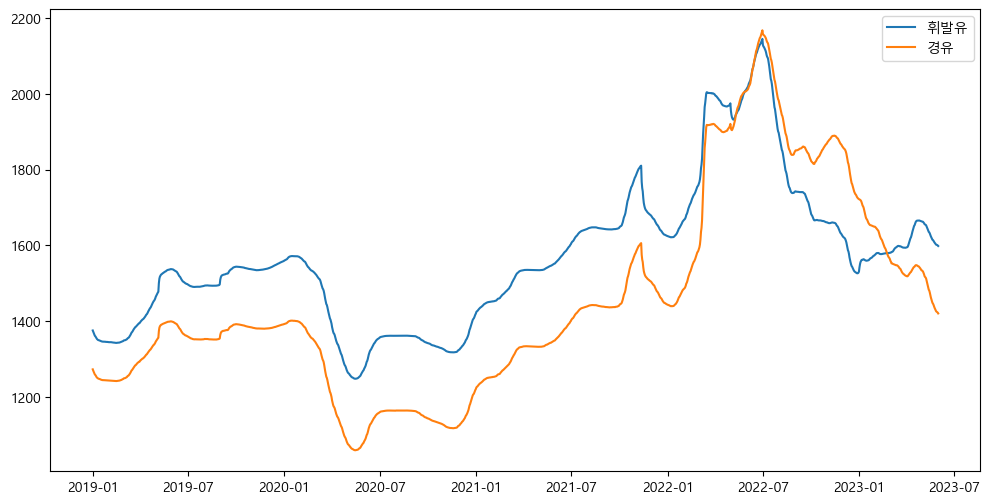

In [61]:
# 기간별 휘발유/경유 판매 가격 그래프
plt.figure(figsize=(12,6))
plt.plot(df_fn["기간"], df_fn['휘발유'])
plt.plot(df_fn["기간"], df_fn['경유'])

plt.legend(['휘발유', '경유'], loc="upper right")
plt.grid
plt.show()

In [71]:
# 2022-05-01 ~ 2022-08-30

df_fn["기간"] = pd.to_datetime(df_fn['기간'])

start_date = pd.to_datetime('2022-05-01')
end_date = pd.to_datetime('2022-08-30')
df_fn_date = df_fn[(df_fn['기간'] >= start_date) & (df_fn['기간'] <= end_date)]

df_fn_date

,기간,휘발유,경유
1216,2022-05-01,1954.796058,1908.756888
1217,2022-05-02,1944.628517,1904.811073
1218,2022-05-03,1937.991174,1903.931666
1219,2022-05-04,1934.474436,1906.659355
1220,2022-05-05,1932.204750,1910.338473
...,...,...,...
1333,2022-08-26,1737.769062,1838.576507
1334,2022-08-27,1738.001095,1838.818827
1335,2022-08-28,1738.057903,1839.072991
1336,2022-08-29,1738.532840,1840.785877


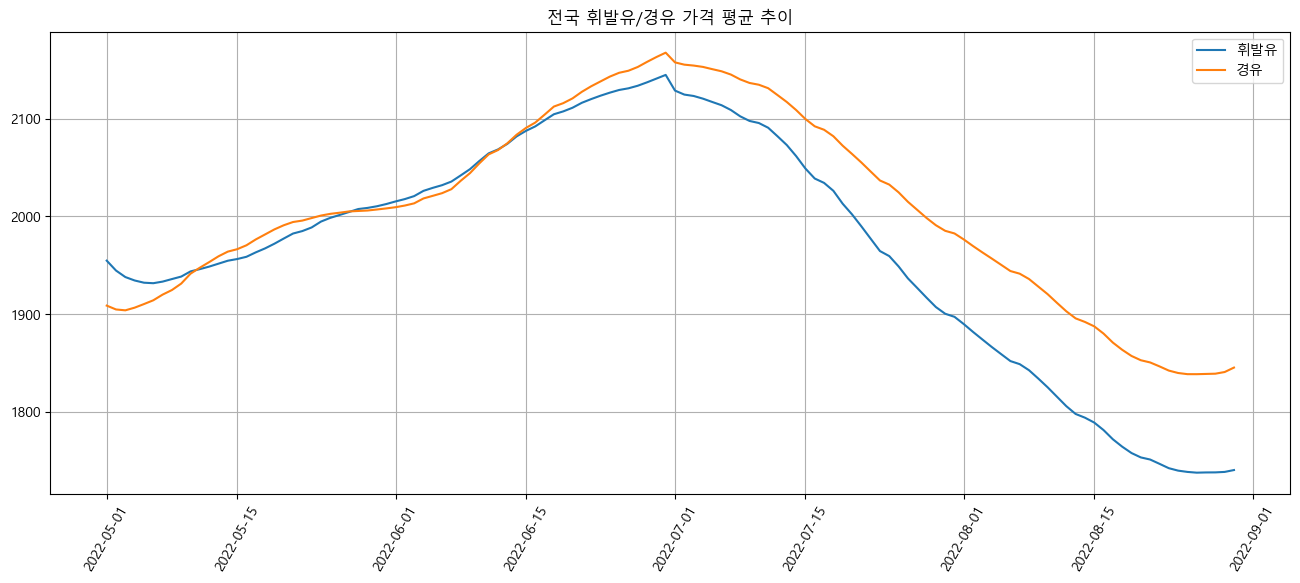

In [72]:
# 전국 휘발유/경유 가격 평균 추이
# - 언제부터 경유가 휘발유를 넘어섰는지 확인
plt.figure(figsize=(16,6))

plt.plot(df_fn_date['기간'], df_fn_date['휘발유'])
plt.plot(df_fn_date['기간'], df_fn_date['경유'])
    
plt.legend(['휘발유', '경유'])
plt.title("전국 휘발유/경유 가격 평균 추이")
plt.xticks(rotation=60)
plt.grid()
plt.show()

In [73]:
# 2022-05-01 ~ 2023-05-30
df_fn["기간"] = pd.to_datetime(df_fn['기간'])

start_date = pd.to_datetime('2022-05-01')
end_date = pd.to_datetime('2023-05-30')
df_fn_date = df_fn[(df_fn['기간'] >= start_date) & (df_fn['기간'] <= end_date)]

df_fn_date

,기간,휘발유,경유
1216,2022-05-01,1954.796058,1908.756888
1217,2022-05-02,1944.628517,1904.811073
1218,2022-05-03,1937.991174,1903.931666
1219,2022-05-04,1934.474436,1906.659355
1220,2022-05-05,1932.204750,1910.338473
...,...,...,...
1606,2023-05-26,1603.517740,1429.015883
1607,2023-05-27,1601.697003,1425.816295
1608,2023-05-28,1601.157093,1424.712498
1609,2023-05-29,1600.667345,1423.865886


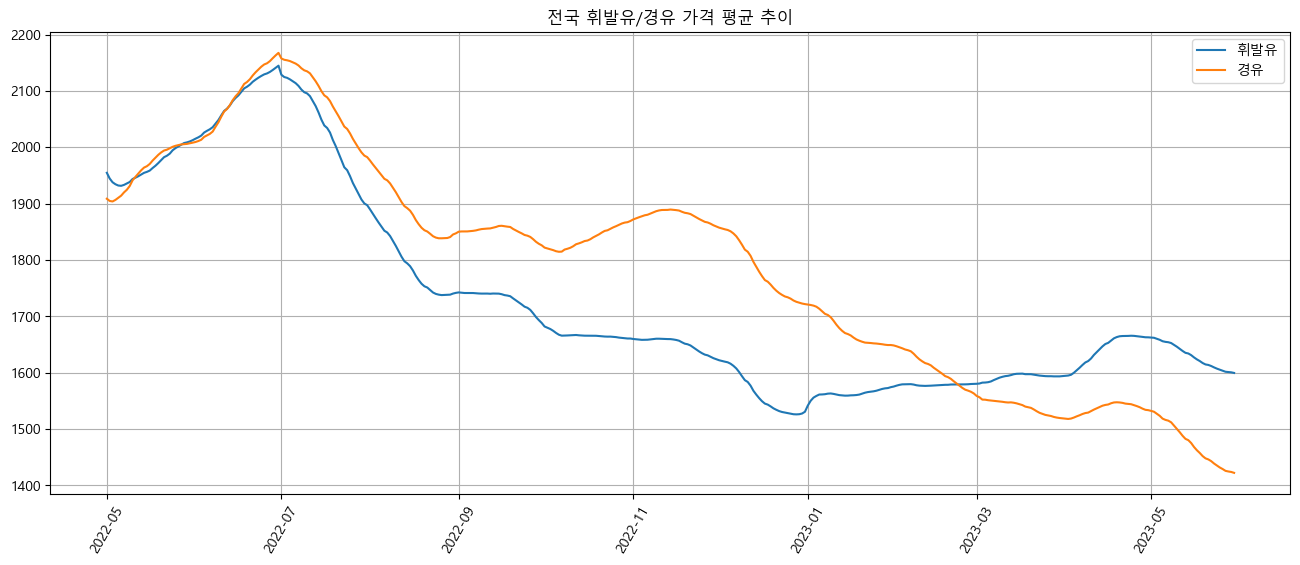

In [74]:
# 전국 휘발유/경유 가격 평균 추이
# - 경유 가격 언제까지 이어지는지 확인
plt.figure(figsize=(16,6))

plt.plot(df_fn_date['기간'], df_fn_date['휘발유'])
plt.plot(df_fn_date['기간'], df_fn_date['경유'])
    
plt.legend(['휘발유', '경유'])
plt.title("전국 휘발유/경유 가격 평균 추이")
plt.xticks(rotation=60)
plt.grid()
plt.show()